In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import sklearn.metrics as skm
from sklearn.metrics import accuracy_score

import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import svm
from sklearn.model_selection import train_test_split

from PIL import Image, ImageOps

In [28]:
def AddSmile(path):
  test_img = Image.open(path)

  test_img = test_img.resize((5,5))
  test_img = test_img.convert('L')
  '''plt.imshow(test_img, cmap = 'gray')
  plt.show()'''

  test_x = np.array(test_img, np.float32)
  test_x = test_x.reshape(-1,25)
  test_x = test_x / 255
  return test_x[0]

In [29]:
def AddGludSmiles(x, y,folderPath):
  for filename in os.listdir(folderPath):
    x.append(AddSmile(os.path.join(folderPath, filename)))
    y.append(1)

def AddUglySmiles(x, y,folderPath):
  for filename in os.listdir(folderPath):
    x.append(AddSmile(os.path.join(folderPath, filename)))
    y.append(0)


In [30]:
x = []
y = []
AddUglySmiles(x,y,'/content/drive/My Drive/Neurons/UglySmiles')
AddGludSmiles(x,y,'/content/drive/My Drive/Neurons/GludSmiles')
x = np.array(x)
y = np.array(y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

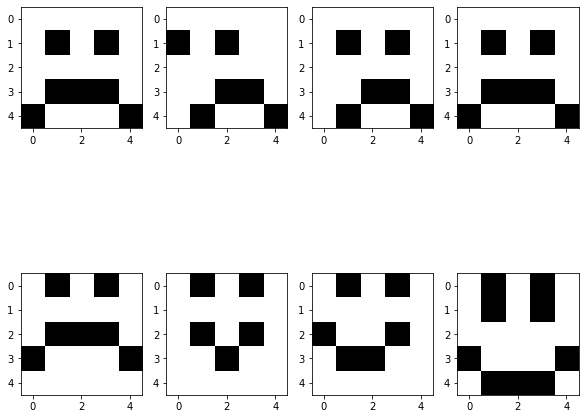

In [32]:
plt.figure(figsize = (10,9))
for i in range(8):
  plt.subplot(2,4, i+1)
  plt.imshow(x[i].reshape(5,5), cmap = "gray")

In [33]:
from sklearn import svm

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
acc = []
for i in kernels:
  clf = svm.SVC(kernel= i)
  clf.fit(X_train, y_train)
  print("Kernel: ", i)
  print("Train score :", clf.score(X_train, y_train))
  print("Test score :", clf.score(X_test, y_test))
  acc.append(clf.score(X_test, y_test))

best_id = acc.index(max(acc))
print("\n\nBest kernel:", kernels[best_id], "Best score:", acc[best_id])

Kernel:  linear
Train score : 1.0
Test score : 0.75
Kernel:  poly
Train score : 1.0
Test score : 0.75
Kernel:  rbf
Train score : 1.0
Test score : 0.75
Kernel:  sigmoid
Train score : 0.5714285714285714
Test score : 0.25


Best kernel: linear Best score: 0.75


In [36]:
clf = svm.SVC(kernel= 'linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
print("train")
print(y,":",clf.predict(x))

train
[0 0 0 0 0 1 1 1 1 1 1] : [0 0 0 0 0 0 1 1 1 1 1]
